In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_name="usedcars.csv"
df = pd.read_csv(file_name)
df.head(2)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1


In [4]:
#object of linera regression
lm = LinearRegression()

In [5]:
# X predictor variable
X = df[['highway-mpg']]
# Y is response variable
Y = df['price']
type(Y)

pandas.core.series.Series

In [6]:
lm.fit(X,Y)

LinearRegression()

In [7]:
YHat = lm.predict(X)
YHat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
valueOfIntercept = lm.intercept_
print(f'Value of valueOfIntercept = {valueOfIntercept}')

valueOfCoefficient = lm.coef_
print(f'Value of valueOfCoefficient = {valueOfCoefficient}')

print(f'final estimated linear model we get Price = {valueOfIntercept}+ {valueOfCoefficient} x highway-mpg')

Value of valueOfIntercept = 38423.3058581574
Value of valueOfCoefficient = [-821.73337832]
final estimated linear model we get Price = 38423.3058581574+ [-821.73337832] x highway-mpg


In [9]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [10]:
X = df[['engine-size']]
Y = df['price']
yhat1 = lm1.fit(X,Y)


In [11]:
lm1.intercept_

-7963.338906281024

In [12]:
lm1.coef_

array([166.86001569])

In [13]:
print(f'Equation {yhat1}={lm1.intercept_}+{lm1.coef_}*X')
price = lm1.intercept_ + (lm1.coef_*df['engine-size'])
price

Equation LinearRegression()=-7963.338906281024+[166.86001569]*X


0      13728.463134
1      13728.463134
2      17399.383479
3      10224.402804
4      14729.623228
           ...     
196    15563.923306
197    15563.923306
198    20903.443808
199    16231.363369
200    15563.923306
Name: engine-size, Length: 201, dtype: float64

In [14]:
# Multiple Linear regression model 
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

ml1 = LinearRegression()
ml1.fit(Z,df[['price']])
print("Co eff",ml1.coef_)
print("intercept",ml1.intercept_)


Co eff [[53.49574423  4.70770099 81.53026382 36.05748882]]
intercept [-15806.62462633]


In [15]:
# Linear Function
Price = ml1.intercept_ + (52.65851272 * df['horsepower']) + (4.69878948 * df['curb-weight']) + (81.95906216 * df['engine-size']) + (33.58258185 * df['highway-mpg'])
Price

0      13572.393671
1      13572.393671
2      18898.393611
3      10486.629917
4      15403.735082
           ...     
196    16563.812425
197    19341.138844
198    20353.687128
199    17681.977202
200    16979.931522
Length: 201, dtype: float64

In [16]:
Z=df[["normalized-losses", "highway-mpg"]]
lm2 = LinearRegression()
lm2.fit(Z,df[['price']])

LinearRegression()

In [17]:
import seaborn as sns
%matplotlib inline 

(0.0, 48184.49497038136)

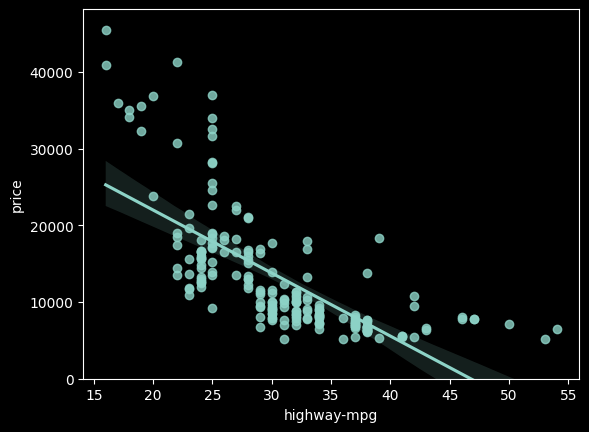

In [18]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [19]:
df[['peak-rpm','price','highway-mpg']].corr()

,peak-rpm,price,highway-mpg
peak-rpm,1.000000,-0.101616,-0.058598
price,-0.101616,1.000000,-0.704692
highway-mpg,-0.058598,-0.704692,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

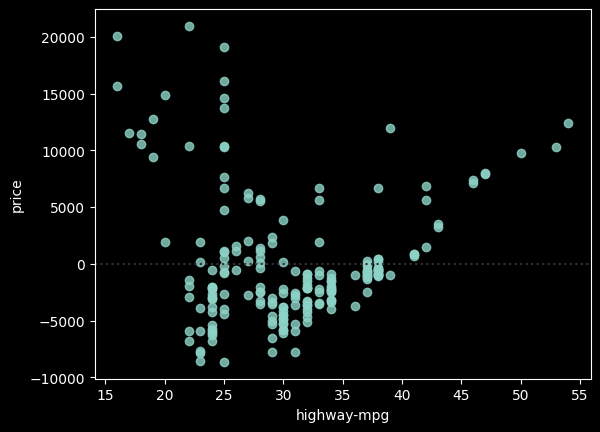

In [20]:
sns.residplot(x='highway-mpg',y='price',data=df)

In [26]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm3 = LinearRegression()
lm3.fit(Z,df[['price']])
print(f'Coeff = {lm3.coef_}')
Y_hat = lm3.predict(Z)

Coeff = [[53.49574423  4.70770099 81.53026382 36.05748882]]


C:\Users\gauta\AppData\Local\Temp\ipykernel_6464\1707039841.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\gauta\AppData\Local\Temp\ipykernel_6464\1707039841.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

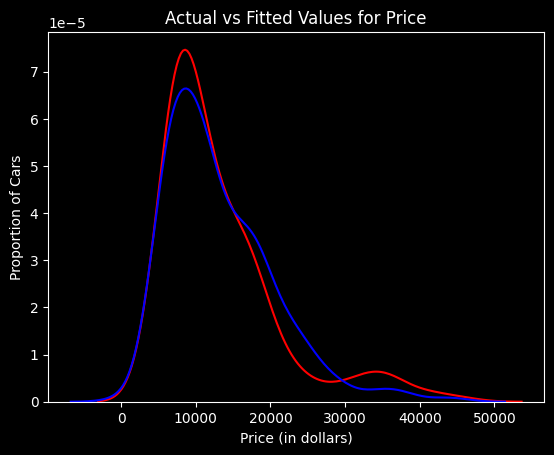

In [35]:

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()

In [37]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [39]:
x = df['highway-mpg']
y = df['price']

In [40]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


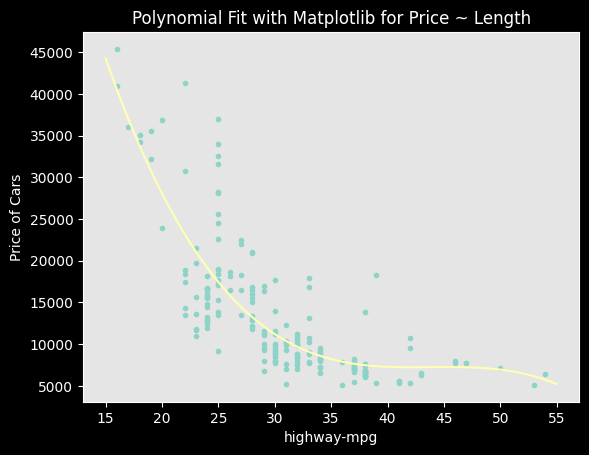

In [41]:
PlotPolly(p, x, y, 'highway-mpg')

In [42]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])